In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib

# Analyse Dataset

## Import and prepare data
The data.csv is too big for overleaf so you can find it here:
https://yaon.org/data.csv

In [7]:
'''import csv'''
import requests
import os.path

CSV_URL = 'https://yaon.org/data.csv'
FILE_NAME = 'data.csv'

if not os.path.isfile(FILE_NAME):
    print(f'Downloading {FILE_NAME}')
    r = requests.get(CSV_URL)
    with open(FILE_NAME, 'wb') as f:
        f.write(r.content)
else:
    print(f'{FILE_NAME} already exists')

import_df = pd.read_csv(FILE_NAME)
import_df.drop(columns=['Unnamed: 0'], inplace=True)
'''Format dataframe'''
df = import_df.pivot_table(index=['Country', 'Year'], columns='Variable', values='Value', aggfunc='first')
df.reset_index(inplace=True)

df.head()

data.csv already exists


Variable,Country,Year,% of agricultural GVA produced by irrigated agriculture,% of agricultural water managed area equipped for irrigation,% of area equipped for full control irrigation actually irrigated,% of area equipped for irrigation by desalinated water,% of area equipped for irrigation by direct use of treated municipal wastewater,% of area equipped for irrigation by direct use of agricultural drainage water,% of area equipped for irrigation by direct use of non-treated municipal wastewater,% of area equipped for irrigation by groundwater,...,Total water withdrawal,Total water withdrawal per capita,Treated municipal wastewater,Treated municipal wastewater discharged (secondary water),Urban population,Urban population with access to safe drinking-water (JMP),Water resources: total external renewable,Water withdrawal for aquaculture,Water withdrawal for cooling of thermoelectric plants,Water withdrawal for livestock (watering and cleaning)
0,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,932.865,NaN,18.18,NaN,NaN,NaN
1,Afghanistan,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,984.350,NaN,18.18,NaN,NaN,NaN
2,Afghanistan,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1038.852,NaN,18.18,NaN,NaN,NaN
3,Afghanistan,1967,NaN,100.0,NaN,NaN,NaN,NaN,NaN,15.399632,...,NaN,NaN,NaN,NaN,1096.428,NaN,18.18,NaN,NaN,NaN
4,Afghanistan,1968,NaN,100.0,NaN,NaN,NaN,NaN,NaN,15.461053,...,NaN,NaN,NaN,NaN,1157.827,NaN,18.18,NaN,NaN,NaN


## Find for us relevant variables
The following list contains all availible variables in the Dataset:

In [8]:
for var in df.columns:
    print(var)

Country
Year
% of agricultural GVA produced by irrigated agriculture
% of agricultural water managed area equipped for irrigation
% of area equipped for full control irrigation actually irrigated
% of area equipped for irrigation by desalinated water
% of area equipped for irrigation by direct use of  treated municipal wastewater
% of area equipped for irrigation by direct use of agricultural drainage water 
% of area equipped for irrigation by direct use of non-treated municipal wastewater
% of area equipped for irrigation by groundwater 
% of area equipped for irrigation by mixed surface water and groundwater
% of area equipped for irrigation by surface water
% of area equipped for irrigation drained
% of area equipped for irrigation power irrigated
% of area equipped for irrigation salinized
% of irrigation potential equipped for irrigation
% of the agricultural holdings with irrigation managed by women
% of the area equipped for irrigation actually irrigated
% of the area equipped 

Now we should define which variables and (maybe not yet) countries we want to look at. Please define those in the following code:

In [9]:
'''relevant variables for us'''
relevant_vars = ['Total water withdrawal',
                 'Agricultural water withdrawal',

                 ]
'''filter countries (no filter if empty)'''
filter_countries = []

## Analyse useabla Data
The following code constructs a heatmap showing if countries have data for our relevant variables for every year.

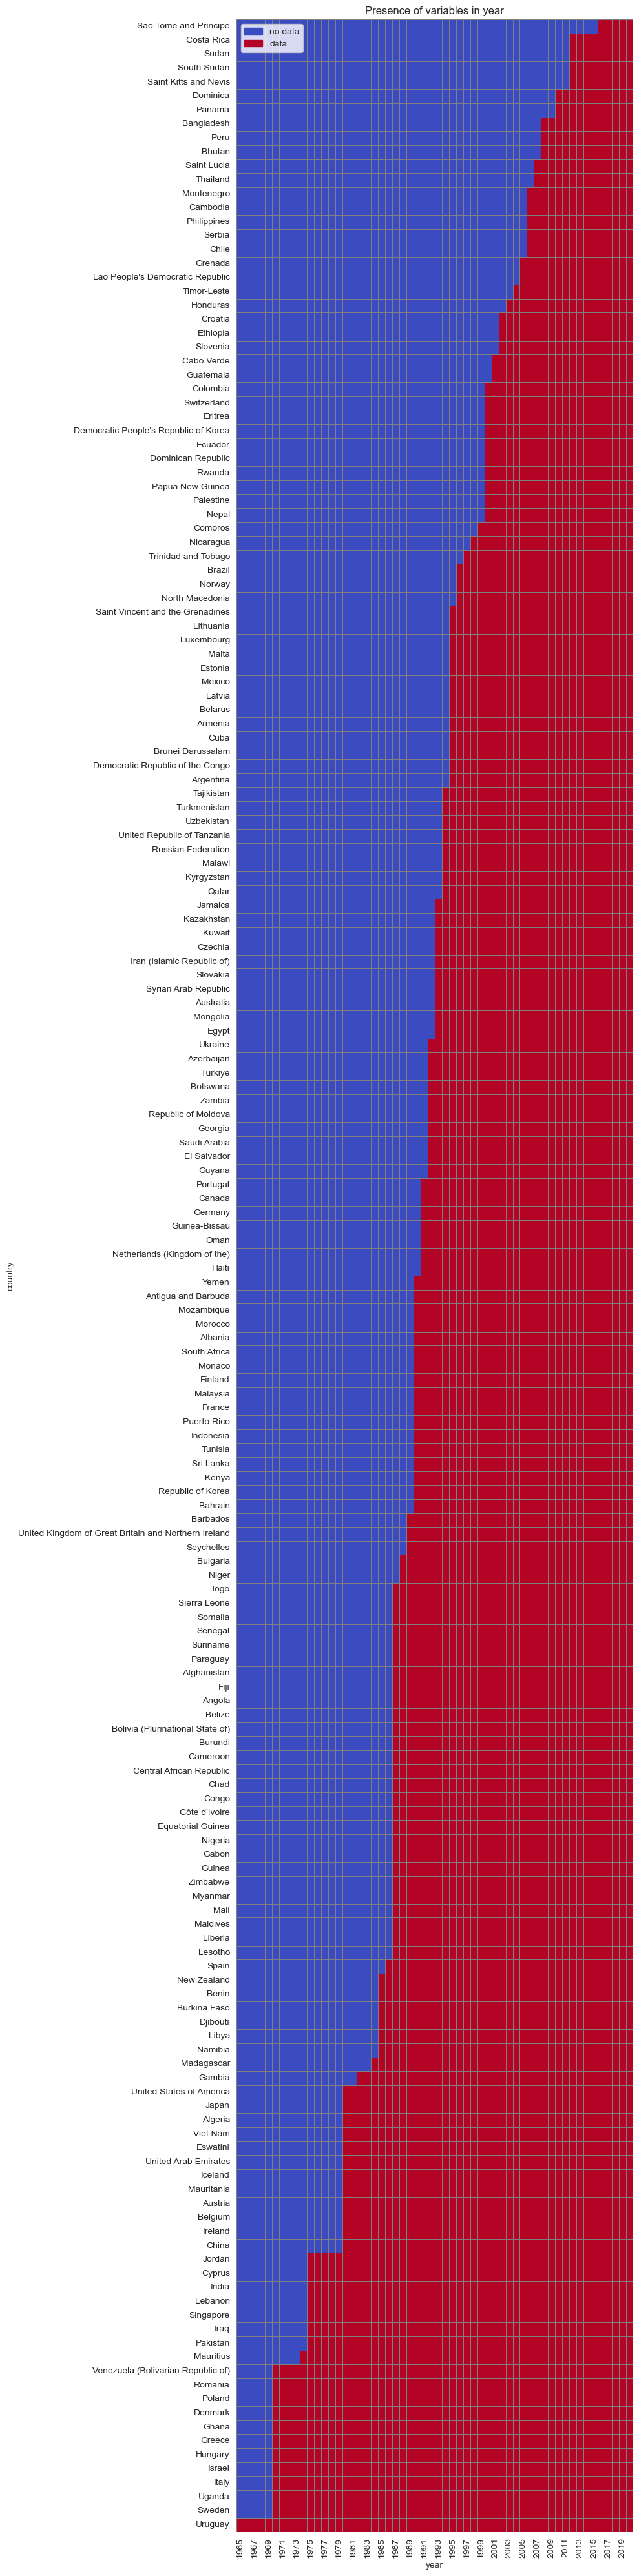

In [10]:
'''Extract relevant variables and drop all NaN'''
data = df[['Country', 'Year', *relevant_vars]]
if filter_countries:
    data = data[data['Country'].isin(filter_countries)]
data = data.dropna()

'''Create dataframe for heatmap'''
years_data = data[['Country', 'Year']]
years_df = years_data.pivot_table(index=['Country'], columns='Year', values='Year', aggfunc=lambda x: True,
                                  fill_value=False)
years_df['True_Count'] = years_df.sum(axis=1)
years_df = years_df.sort_values(by='True_Count', ascending=True)
years_df.drop('True_Count', axis=1, inplace=True)

'''spaß mit colormap'''
cmap_name = 'coolwarm'
cmap = matplotlib.colormaps[cmap_name]
color_0 = cmap(0.0)
color_1 = cmap(1.0)

'''create heatmap'''
plt.figure(figsize=(10, math.ceil(math.log(years_data['Country'].nunique(), 2)) * 5))
ax = sns.heatmap(years_df,
                 annot=False,
                 cmap=cmap_name,
                 linewidths=0.5,
                 linecolor='gray',
                 cbar=False
                 )

# Manuelle Legende
blue_patch = mpatches.Patch(color=color_0, label='no data')
red_patch = mpatches.Patch(color=color_1, label='data')
plt.legend(handles=[blue_patch, red_patch], loc='upper left')

plt.title('Presence of variables in year')
plt.xlabel('year')
plt.ylabel('country')

plt.tight_layout()
plt.show()

## How can we answer our questions and which variables could help

### 1. What is the prevailing global trend in terms of water utilization within the agricultural sector and what factors contribute to these changes?

#### Steps

1. Find variables about agricultural water utilization:
    - it can be useful to use PCA to reduce the amount of variables (see down below) that we want to analyze
2. Since we may have a lot of factors that co-influence the agricultural water utilization (climate, population, demand, etc.) we could use a script to try and find correlations between the factors

#### Variables about Agricultural water utilization (from FAO AQUASTAT)

- % of agricultural GVA produced by irrigated agriculture
- % of agricultural water managed area equipped for irrigation
- % of area equipped for irrigation by direct use of treated municipal wastewater
- % of area equipped for irrigation by direct use of agricultural drainage water 
- % of the agricultural holdings with irrigation managed by women
- % of the cultivated area equipped for irrigation
- % of total country area cultivated
- % of total cultivated area drained
- % of total grain production irrigated
- Agricultural water withdrawal
- Agricultural water withdrawal as % of total renewable water resources
- Agricultural water withdrawal as % of total water withdrawal
- Agriculture, value added (% GDP)
- Agriculture, value added to GDP
- Arable land area
- Area equipped for irrigation by direct use of agricultural drainage water
- Cultivated area (arable land + permanent crops)
- Direct use of agricultural drainage water
- Harvested irrigated permanent crop area: Bananas
- Harvested irrigated permanent crop area: Citrus
- Harvested irrigated permanent crop area: Cocoa beans
- Harvested irrigated permanent crop area: Coconuts
- Harvested irrigated permanent crop area: Coffee
- Harvested irrigated permanent crop area: Grapes
- Harvested irrigated permanent crop area: Grass and Fodder
- Harvested irrigated permanent crop area: Oil palm
- Harvested irrigated permanent crop area: Olives
- Harvested irrigated permanent crop area: Other crops
- Harvested irrigated permanent crop area: Other fruits
- Harvested irrigated permanent crop area: Plantains
- Harvested irrigated permanent crop area: Rubber
- Harvested irrigated permanent crop area: Tea
- Harvested irrigated permanent crop area: Total
- Harvested irrigated temporary crop area: Barley
- Harvested irrigated temporary crop area: Cassava
- Harvested irrigated temporary crop area: Cotton
- Harvested irrigated temporary crop area: Flowers
- Harvested irrigated temporary crop area: Fodder
- Harvested irrigated temporary crop area: Groundnuts
- Harvested irrigated temporary crop area: Leguminous crops
- Harvested irrigated temporary crop area: Maize
- Harvested irrigated temporary crop area: Millet
- Harvested irrigated temporary crop area: Other cereals
- Harvested irrigated temporary crop area: Other crops
- Harvested irrigated temporary crop area: Other roots and tubers
- Harvested irrigated temporary crop area: Potatoes
- Harvested irrigated temporary crop area: Rice
- Harvested irrigated temporary crop area: Sesame
- Harvested irrigated temporary crop area: Sorghum
- Harvested irrigated temporary crop area: Soybeans
- Harvested irrigated temporary crop area: Sugar beet
- Harvested irrigated temporary crop area: Sugarcane
- Harvested irrigated temporary crop area: Sunflower
- Harvested irrigated temporary crop area: Sweet potatoes
- Harvested irrigated temporary crop area: Tobacco
- Harvested irrigated temporary crop area: Total
- Harvested irrigated temporary crop area: Vegetables
- Harvested irrigated temporary crop area: Wheat
- Irrigated cropping intensity
- Non-irrigated cultivated area drained
- Permanent crops area
- SDG 6.4.1. Irrigated Agriculture Water Use Efficiency
- Total agricultural water managed area
- Total cultivated area drained
- Total harvested irrigated crop area (full control irrigation)
- (Water withdrawal for aquaculture)
- Water withdrawal for cooling of thermoelectric plants
- Water withdrawal for livestock (watering and cleaning)

#### Factors that influence agriculture water utilization

- Climate:
    - Source: <https://gcos.wmo.int/en/essential-climate-variables/table>
    - Variables:
        - Atmosphere
            - Precipitation
            - Pressure 
            - Radiation budget
            - Temperature 
            - Water vapour 
            - Wind speed and direction 
            
            - Earth radiation budget 
            - Lightning 
            - Temperature 
            - Water vapor 
            - Wind speed and direction 
            - Clouds 
            
            - Aerosols 
            - Carbon dioxide, methane and other greenhouse gases 
            - Ozone 
            - Precursors for aerosols and ozone 
        
        - Land:
            - Groundwater 
            - Lakes 
            - River discharge
            - Terrestrial water storage
            
            - Glaciers
            - Ice sheets and ice shelves
            - Permafrost
            - Snow
            
            - Above-ground biomass
            - Albedo
            - Evaporation from land
            - Fire
            - Fraction of absorbed photosynthetically active radiation (FAPAR)
            - Land cover
            - Land surface temperature
            - Leaf area index
            - Soil carbon
            - Soil moisture
            
            - Anthropogenic Greenhouse gas fluxes
            - Anthropogenic water use
        
        - Ocean:
            - Ocean surface heat flux 
            - Sea ice
            - Sea level
            - Sea state
            - Sea surface currents
            - Sea surface salinity
            - Sea surface stress 
            - Sea surface temperature
            - Subsurface currents 
            - Subsurface salinity 
            - Subsurface temperature
            
            - Inorganic carbon
            - Nitrous oxide
            - Nutrients
            - Ocean colour
            - Oxygen
            - Transient tracers
            
            - Marine habitats
            - Plankton
                        - 


### 2. How do countries that heavily rely on their agricultural industry deal with the problem of water scarcity

#### 

### 3. What is the impact of climate change on fresh-water availability and the agricultural sector

